In [ ]:
# this allows the notebook to import src code in a sibling module
import load_package
__package__ = load_package.load()

In [263]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Preprocessing

from sklearn.preprocessing import StandardScaler

# Modelling Missing Data

# SVM 
from sklearn.svm import SVR
# XGB
import xgboost as xgb
# NN
import torch
from torch import optim


# model evaluation 
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', None)

In [40]:
df = pd.read_csv('../data/shortstopdefense.csv')

In [41]:
df = df.sort_values('id')

In [42]:
df = df.reset_index(drop=True).reset_index()
df['launch_spin_rate_missing_ind'] = df['launch_spin_rate'].apply(lambda x: int(x == 0))
df['launch_spin_rate_missing_ind_cum'] = df['launch_spin_rate_missing_ind'].cumsum()

In [79]:
df[:20]

,index,id,playerid,pos,player_x,player_y,player_vx,player_vy,playtype,eventtype,trajectory,fielded_pos,fieldingplay,fielded_scoring,player_out_credit,is_runnersgoing,is_bunt,launch_vert_ang,launch_horiz_ang,launch_speed,launch_spin_rate,launch_spin_axis,landing_location_radius,hang_time,landing_location_x,landing_location_y,runner_on_first,runner_on_second,runner_on_third,launch_spin_rate_missing_ind,launch_spin_rate_missing_ind_cum,a
0,0,3950199,164881,6,-50.56360,137.77600,0.512821,-0.074870,hit_into_play_score,single,G,4.0,47.0,f_deflection,False,False,False,-4.205603,-3.917480,104.04370,NaN,NaN,25.891950,0.161743,-0.877063,25.877100,False,True,False,1,1,NaN
1,1,3950219,171806,6,21.58596,152.11240,0.194912,-0.437651,hit_into_play_no_out,single,G,7.0,7.0,f_fielded_ball,False,False,False,9.609667,-30.936430,81.27280,NaN,NaN,142.977000,1.419067,-72.960200,122.960300,False,False,False,1,2,NaN
2,2,3950229,171806,6,-11.55557,152.03440,-0.242068,-0.736379,hit_into_play,field_out,G,4.0,43.0,f_assist,False,False,False,-30.484780,15.882390,80.81991,3786.714,180.00000,5.316368,0.027466,1.092195,5.202969,True,False,False,0,2,3786.714
3,3,3950231,171806,6,-52.81462,143.37700,0.283764,-0.585699,hit_into_play,field_out,G,5.0,53.0,f_assist,False,False,False,-58.518080,-30.381020,72.66642,NaN,NaN,1.733626,0.017700,-0.447034,1.674999,False,True,False,1,3,NaN
4,4,3950241,164881,6,-51.79118,136.43610,0.378863,-0.157592,hit_into_play_no_out,single,G,7.0,7.0,f_fielded_ball,False,False,False,-1.079831,-28.757920,100.01750,NaN,NaN,39.121890,0.264282,-18.183530,34.639310,False,False,False,1,4,NaN
5,5,3950251,164881,6,-36.54874,88.00151,-0.450961,-0.165034,hit_into_play,field_out,G,4.0,43.0,f_assist,False,False,False,3.290893,16.260950,80.73653,NaN,NaN,62.391350,0.559692,17.215940,59.969090,True,False,False,1,5,NaN
6,6,3950266,171806,6,-45.65237,136.52970,0.261848,-0.980501,hit_into_play,field_out,G,5.0,53.0,f_assist,False,False,False,-2.068843,-32.878770,90.10675,NaN,NaN,30.763420,0.226440,-16.064880,26.235620,False,False,False,1,6,NaN
7,7,3950275,164881,6,-53.07020,136.15080,-0.035531,-0.304563,hit_into_play,field_out,G,6.0,63.0,f_assist,True,False,False,-8.807625,-25.372700,101.12440,3390.692,50.15297,17.577850,0.114136,-6.993490,16.126750,False,False,False,0,6,3390.692
8,8,3950283,164881,6,-33.92324,135.14190,-0.250443,-0.382297,hit_into_play,field_out,G,5.0,53.0,f_assist,False,False,False,-24.508720,-39.363000,77.26941,NaN,NaN,6.118822,0.043335,-2.663561,5.508668,True,False,False,1,7,NaN
9,9,3950297,171806,6,-20.15694,148.27360,-0.312839,-0.226773,hit_into_play,field_out,G,6.0,63.0,f_assist,True,False,False,-2.864614,-5.228644,96.56696,NaN,NaN,33.034350,0.243530,-3.078129,32.890630,False,False,False,1,8,NaN


In [72]:
df['launch_spin_rate'] = df.apply(lambda x: np.nan if x['launch_spin_rate_missing_ind'] == 1 else x['launch_spin_rate'], axis=1)
df['launch_spin_axis'] = df.apply(lambda x: np.nan if x['launch_spin_rate_missing_ind'] == 1 else x['launch_spin_axis'], axis=1)

<AxesSubplot:xlabel='index', ylabel='launch_spin_rate_missing_ind_cum'>

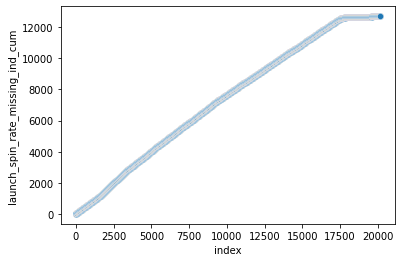

In [46]:
sns.scatterplot(data=df, x='index', y='launch_spin_rate_missing_ind_cum', alpha=0.4)

In [47]:
df.groupby('launch_spin_rate_missing_ind').count()

,index,id,playerid,pos,player_x,player_y,player_vx,player_vy,playtype,eventtype,...,launch_spin_rate,launch_spin_axis,landing_location_radius,hang_time,landing_location_x,landing_location_y,runner_on_first,runner_on_second,runner_on_third,launch_spin_rate_missing_ind_cum
launch_spin_rate_missing_ind,,,,,,,,,,,,,,,,,,,,,
0,7445,7445,7445,7445,7445,7445,7444,7444,7445,7445,...,7445,7445,7445,7445,7445,7445,7445,7445,7445,7445
1,12706,12706,12706,12706,12706,12706,12706,12706,12706,12706,...,12706,12706,12706,12706,12706,12706,12706,12706,12706,12706


<AxesSubplot:xlabel='playerid', ylabel='launch_spin_rate_missing_ind'>

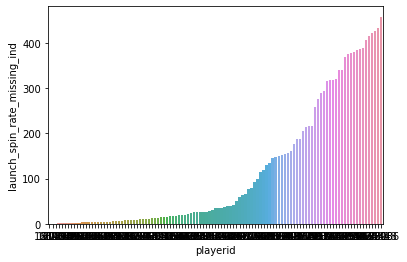

In [63]:
by_player = df.groupby('playerid').sum()[['launch_spin_rate_missing_ind']].sort_values('launch_spin_rate_missing_ind').reset_index()
by_player['playerid'] = by_player['playerid'].astype(str)
sns.barplot(data=by_player, x='playerid', y='launch_spin_rate_missing_ind')

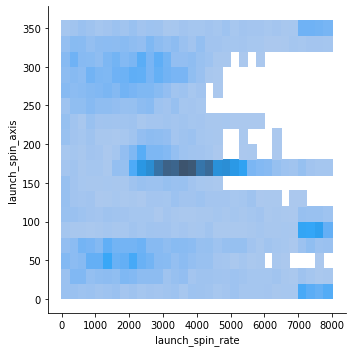

In [85]:

sns.displot(df, x='launch_spin_rate', y='launch_spin_axis')

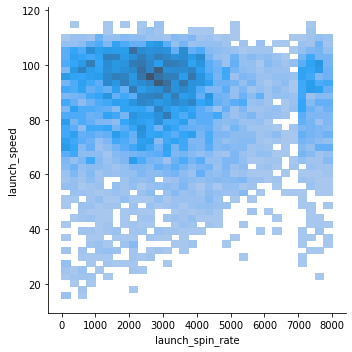

In [81]:


sns.displot(df, x='launch_spin_rate', y='launch_speed')

# Let's Create a statistical model of spin from launch, landing, and hang time

In [298]:
df_with_spin = df[df['launch_spin_rate_missing_ind'] == 0]

In [299]:
df_with_spin

,index,id,playerid,pos,player_x,player_y,player_vx,player_vy,playtype,eventtype,trajectory,fielded_pos,fieldingplay,fielded_scoring,player_out_credit,is_runnersgoing,is_bunt,launch_vert_ang,launch_horiz_ang,launch_speed,launch_spin_rate,launch_spin_axis,landing_location_radius,hang_time,landing_location_x,landing_location_y,runner_on_first,runner_on_second,runner_on_third,launch_spin_rate_missing_ind,launch_spin_rate_missing_ind_cum,a
2,2,3950229,171806,6,-11.555570,152.03440,-0.242068,-0.736379,hit_into_play,field_out,G,4.0,43.0,f_assist,False,False,False,-30.484780,15.88239,80.81991,3786.7140,180.00000,5.316368,0.027466,1.092195,5.202969,True,False,False,0,2,3786.7140
7,7,3950275,164881,6,-53.070200,136.15080,-0.035531,-0.304563,hit_into_play,field_out,G,6.0,63.0,f_assist,True,False,False,-8.807625,-25.37270,101.12440,3390.6920,50.15297,17.577850,0.114136,-6.993490,16.126750,False,False,False,0,6,3390.6920
14,14,3950349,171806,6,-46.421700,139.53580,-0.291398,-0.938881,hit_into_play,field_out,G,5.0,53.0,f_assist,False,False,False,-27.503030,-38.37192,84.66045,3671.2190,180.00000,4.484784,0.028687,-2.732962,3.555869,False,True,True,0,12,3671.2190
16,16,3950377,171806,6,-18.317270,145.80770,0.280212,-0.748735,hit_into_play,force_out,G,4.0,46.0,f_assist,False,False,False,4.506907,27.74438,62.91505,2773.9980,325.53050,57.307900,0.636597,26.332830,50.899680,True,False,False,0,13,2773.9980
17,17,3950384,171806,6,-14.545570,152.15820,0.237100,-0.310876,hit_into_play,field_out,G,3.0,3.0,f_putout,False,False,False,-26.703020,36.53402,88.79197,3767.2440,180.00000,4.950880,0.028687,2.644314,4.185548,True,False,False,0,13,3767.2440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20146,20146,4244995,167960,6,8.379621,95.62597,-0.491501,-0.196582,hit_into_play_score,fielders_choice,G,3.0,3.0,f_fielded_ball,False,False,False,-20.785850,38.13233,69.40483,2464.6120,178.78000,6.044525,0.043335,2.632335,5.441240,False,False,True,0,12706,2464.6120
20147,20147,4245005,167960,6,26.562770,150.54200,-0.140012,0.225195,hit_into_play,field_out,G,6.0,63.0,f_assist,True,True,False,-10.426530,13.90681,93.66300,1340.8170,301.93760,10.685850,0.065308,1.566395,10.570420,True,False,False,0,12706,1340.8170
20148,20148,4245008,11742,6,-53.527720,136.22160,0.352858,-0.953399,hit_into_play,field_out,G,3.0,3.0,f_putout,False,False,False,-15.566220,30.56014,82.06470,7343.8330,346.29440,8.547586,0.078735,3.968861,7.570294,False,False,False,0,12706,7343.8330
20149,20149,4245045,11742,6,-46.753770,140.59510,0.094240,-1.257743,hit_into_play,field_out,G,5.0,53.0,f_assist,False,False,False,15.700130,-31.42226,55.98019,667.8084,127.11630,104.645200,1.463013,-52.794910,90.351020,False,False,False,0,12706,667.8084


### Preprocessing

In [300]:

feature_columns = ['launch_vert_ang','launch_horiz_ang','launch_speed','hang_time','landing_location_radius']
label = 'launch_spin_rate'

x_scalar = StandardScaler()
y_scalar = StandardScaler()
df_with_spin[feature_columns] = x_scalar.fit_transform(df_with_spin[feature_columns])
df_with_spin[[label]] = y_scalar.fit_transform(df_with_spin[[label]])

test_pct = 0.1
val_pct = 0.2


train_and_val_ind = df_with_spin.sample(frac=1-test_pct).index
test_ind = df_with_spin.drop(train_and_val_ind).index

train_ind = df_with_spin.loc[train_and_val_ind].sample(frac=1-val_pct).index
val_ind = df_with_spin.loc[train_and_val_ind].drop(train_ind).index

# read in data
train_dataset = df_with_spin.loc[train_ind]
val_dataset = df_with_spin.loc[val_ind]
test_dataset = df_with_spin.loc[test_ind]

/Users/dangoldberg/miniconda3/envs/tbj2021/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/dangoldberg/miniconda3/envs/tbj2021/lib/python3.7/site-packages/pandas/core/indexing.py:1737: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/Users/dangoldberg/miniconda3/envs/tbj2021/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

### XGB

In [301]:

dtrain = xgb.DMatrix(train_dataset[feature_columns], label=train_dataset[label])
dval = xgb.DMatrix(val_dataset[feature_columns], label=val_dataset[label])
dtest = xgb.DMatrix(test_dataset[feature_columns], label=test_dataset[label])

In [302]:
# specify parameters via map
param = {'max_depth':25, 'eta':0.5, 'objective':'reg:squarederror' }
num_round = 4
bst = xgb.train(param, dtrain, num_round)
# make prediction
preds = bst.predict(dval)

In [303]:
preds

array([ 0.23159905,  0.53370774,  0.00897551, ..., -0.91184497,
       -0.22760913, -0.3049364 ], dtype=float32)

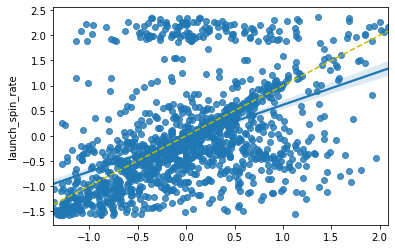

In [304]:
sns.regplot(x=preds, y=val_dataset[label])
plt.plot(*2*[np.linspace(min(preds), max(preds), 100)], '--', c='y')

In [305]:
print(mean_squared_error(preds, val_dataset[label]))
print(mean_squared_error(y_scalar.inverse_transform(preds), y_scalar.inverse_transform(val_dataset[label])))

0.8345100941400327
3416202.476602251


### SVM

In [306]:
model = SVR(kernel='rbf', C=10.0)

In [307]:
model.fit(train_dataset[feature_columns], train_dataset[label])

SVR(C=10.0)

In [308]:
preds = model.predict(val_dataset[feature_columns])

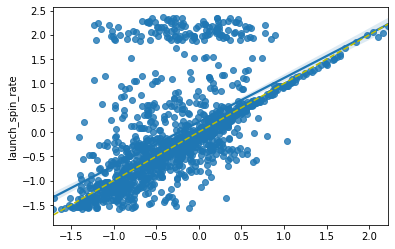

In [309]:
sns.regplot(x=preds, y=val_dataset[label])
plt.plot(*2*[np.linspace(min(preds), max(preds), 100)], '--', c='y')

In [310]:
print(mean_squared_error(preds, val_dataset[label]))
print(mean_squared_error(y_scalar.inverse_transform(preds), y_scalar.inverse_transform(val_dataset[label])))

0.7206257963530853
2949998.6202312745


### NN

In [312]:
x = torch.tensor(train_dataset[feature_columns].values, dtype=torch.float)
y = torch.tensor(train_dataset[label].values, dtype=torch.float)

x_val = torch.tensor(val_dataset[feature_columns].values, dtype=torch.float)
y_val = torch.tensor(val_dataset[label].values, dtype=torch.float)

In [318]:

D_in = len(feature_columns)
H1 = 20
H2 = 10
D_out = 1

pct_dropout = 0.2

model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H1),
    torch.nn.ReLU(),
    torch.nn.BatchNorm1d(H1),
    torch.nn.Dropout(pct_dropout),
#     torch.nn.Linear(H1, H2),
#     torch.nn.Tanh(),
#     torch.nn.BatchNorm1d(H2),
#     torch.nn.Dropout(pct_dropout),
    torch.nn.Linear(H1, D_out)
)

loss_fn = torch.nn.MSELoss()  # this is for regression mean squared loss
optimizer = optim.Adam(model.parameters(), lr=0.5)
lr_scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.1, threshold=0.001)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

for t in range(100):
    y_pred = model(x)
    y_val_pred = model(x_val)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    val_loss = loss_fn(y_val_pred, y_val)
    if t % 5 == 0:
        print(t, loss.item(), get_lr(optimizer))

    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    optimizer.step()
    lr_scheduler.step(val_loss)



0 1.5330830812454224 0.5
5 3.230745792388916 0.5
10 1.9757076501846313 0.5
15 1.376558780670166 0.5
20 1.2126233577728271 0.5
25 1.131266713142395 0.5
30 1.0832035541534424 0.5
35 1.0310454368591309 0.5
40 1.0035656690597534 0.5
45 1.0097055435180664 0.5
50 1.0041614770889282 0.5
55 1.0039089918136597 0.5
60 1.0013742446899414 0.5
65 1.0004055500030518 0.5
70 0.9998088479042053 0.5
75 0.9995228052139282 0.05
80 0.9994776248931885 0.05
85 0.9994309544563293 0.005000000000000001
90 0.9994198083877563 0.005000000000000001
95 0.9994166493415833 0.0005000000000000001


In [319]:
preds = model(x_val).detach().numpy()[:,0]

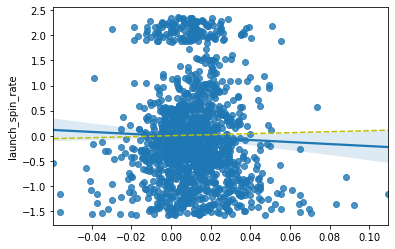

In [320]:
sns.regplot(x=preds, y=val_dataset[label])
plt.plot(*2*[np.linspace(min(preds), max(preds), 100)], '--', c='y')

In [297]:
y_scalar.inverse_transform(preds)

array([ 0.12170038, -0.15938127, -0.21926308, ..., -1.1416049 ,
       -0.7202166 , -0.43810844], dtype=float32)